
# Capstone Project: Prediksi Biaya Asuransi Medis

Selamat datang di proyek puncak (capstone project) kita! Di sini, kita akan menerapkan **semua** keterampilan yang telah kita pelajari dari Part 1 hingga Part 4. Kita akan bekerja pada studi kasus yang realistis dari awal hingga akhir: dari memahami masalah, membersihkan data, membandingkan beberapa model, menyetel hyperparameter, hingga memberikan kesimpulan akhir.

**Studi Kasus:**
Kita akan menggunakan dataset "Insurance Forecast by using Linear Regression" dari Kaggle. Tujuannya adalah membangun sebuah model regresi yang dapat memprediksi biaya medis individu (`charges`) berdasarkan berbagai atribut seperti usia, jenis kelamin, BMI, dan kebiasaan merokok.

**Alur Kerja Proyek:**
1.  **Part 1: Problem Definition & Data Exploration (EDA)**
2.  **Part 2: Preprocessing & Pipeline Construction**
3.  **Part 3: Model Comparison and Selection**
4.  **Part 4: Hyperparameter Tuning on Top Candidates**
5.  **Part 5: Final Evaluation, Interpretation, and Conclusion**




---
## Part 1: Problem Definition & Data Exploration (EDA)

**Tujuan:** Memahami konteks bisnis, mendefinisikan target prediksi, dan melakukan analisis eksplorasi data untuk membangun hipotesis awal.



In [19]:

# Impor library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set_theme(style="whitegrid")




### 1.1 Memuat dan Memahami Data



In [20]:

# Muat data dari URL raw GitHub (sumber umum untuk dataset Kaggle ini)
url = 'insurance.csv'
df = pd.read_csv(url)

# Tampilkan 5 baris pertama
print("Data Awal:")
df.head()



Data Awal:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# Dapatkan informasi dasar tentang dataset
print("\nInformasi DataFrame:")
df.info()


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
# Dapatkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



**Temuan Awal:**
* Dataset terdiri dari 1338 baris dan 7 kolom.
* **Tidak ada nilai yang hilang (non-null)**, yang menyederhanakan langkah preprocessing kita.
* Terdapat 3 kolom kategorikal (`sex`, `smoker`, `region`) dan 4 kolom numerik (`age`, `bmi`, `children`, `charges`).
* `charges` adalah variabel target kita.




### 1.2 Analisis Visual (EDA)

Mari kita visualisasikan data untuk menemukan pola.



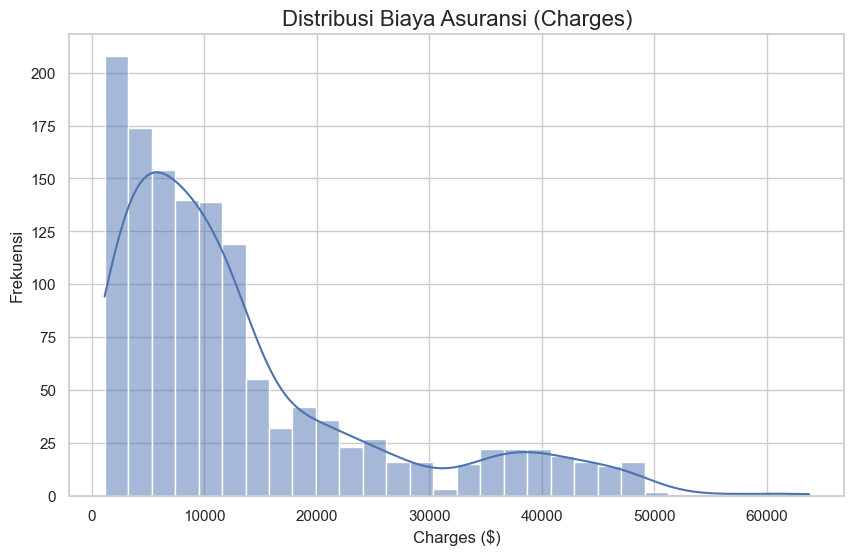

In [23]:

# Distribusi dari variabel target (charges)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribusi Biaya Asuransi (Charges)', fontsize=16)
plt.xlabel('Charges ($)')
plt.ylabel('Frekuensi')
plt.show()




**Observasi:** Distribusi `charges` sangat miring ke kanan (*right-skewed*). Sebagian besar orang memiliki biaya rendah, tetapi ada beberapa orang dengan biaya yang sangat tinggi.



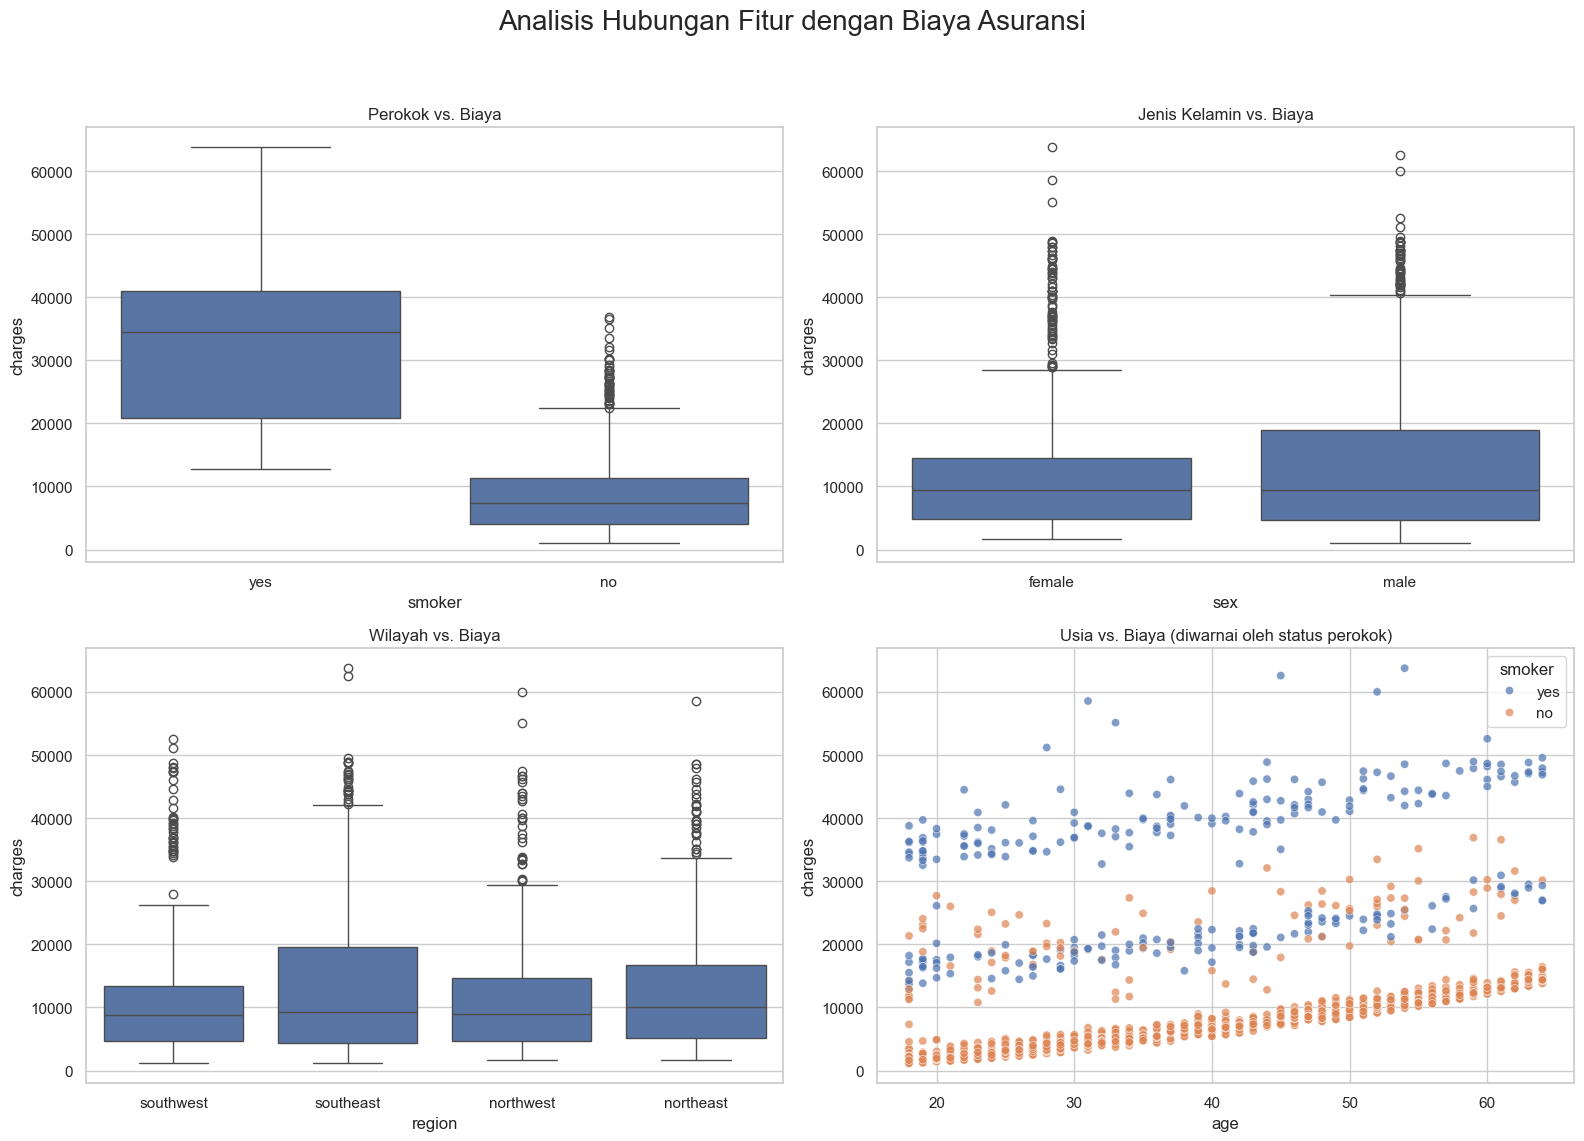

In [24]:

# Hubungan antara fitur dan target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisis Hubungan Fitur dengan Biaya Asuransi', fontsize=20)

# Smoker vs Charges
sns.boxplot(ax=axes[0, 0], data=df, x='smoker', y='charges')
axes[0, 0].set_title('Perokok vs. Biaya')

# Sex vs Charges
sns.boxplot(ax=axes[0, 1], data=df, x='sex', y='charges')
axes[0, 1].set_title('Jenis Kelamin vs. Biaya')

# Region vs Charges
sns.boxplot(ax=axes[1, 0], data=df, x='region', y='charges')
axes[1, 0].set_title('Wilayah vs. Biaya')

# Age vs Charges
sns.scatterplot(ax=axes[1, 1], data=df, x='age', y='charges', hue='smoker', alpha=0.7)
axes[1, 1].set_title('Usia vs. Biaya (diwarnai oleh status perokok)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



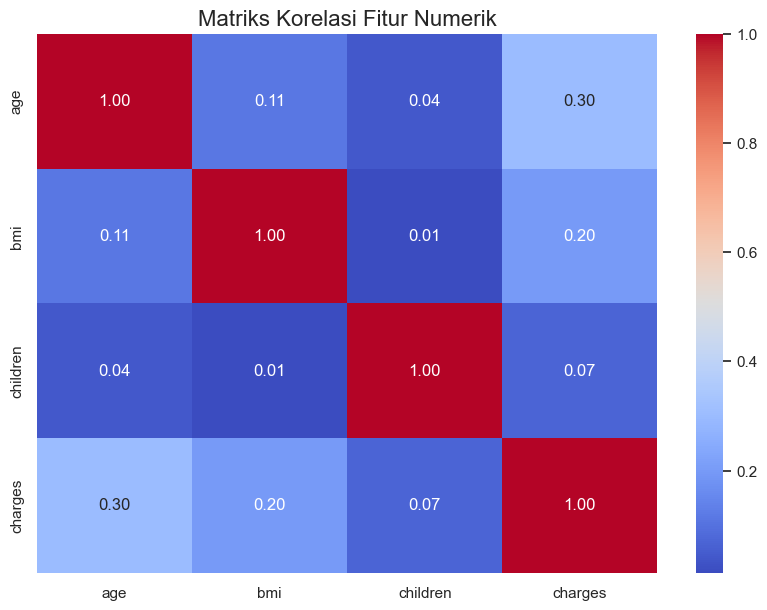

In [25]:

# Matriks korelasi untuk fitur numerik
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.show()




**Hipotesis Awal dari EDA:**
1.  **`smoker` adalah prediktor yang sangat kuat.** Ada perbedaan biaya yang sangat besar antara perokok dan non-perokok.
2.  **`age` memiliki korelasi positif** dengan `charges`. Semakin tua seseorang, semakin tinggi biayanya.
3.  **`bmi` juga memiliki korelasi positif**, meskipun tidak sekuat usia.
4.  `sex` dan `region` tampaknya tidak memiliki pengaruh yang signifikan secara mandiri.




---
## Part 2: Preprocessing & Pipeline Construction

**Tujuan:** Menyiapkan data untuk pemodelan dan merangkum semua langkah dalam sebuah `Pipeline` yang efisien.



In [26]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [27]:

# Pisahkan fitur (X) dan target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Lakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:

# Identifikasi kolom numerik dan kategorikal
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Buat pipeline preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)




Kita telah berhasil membuat `preprocessor`. Ini adalah "cetakan" yang siap digabungkan dengan model apa pun.




---
## Part 3: Model Comparison and Selection

**Tujuan:** Menjalankan "turnamen" model untuk menemukan algoritma terbaik untuk masalah ini.



In [29]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [30]:

# Buat dictionary berisi model-model kandidat
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Siapkan list untuk menyimpan hasil
results = []
names = []

# Jalankan perbandingan
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean RMSE = {np.sqrt(-cv_results.mean()):.4f} (Std = {np.sqrt(cv_results.std()):.4f})")



Linear Regression: Mean RMSE = 6160.1860 (Std = 2243.1727)
Ridge: Mean RMSE = 6159.9505 (Std = 2237.0559)
Random Forest: Mean RMSE = 4927.0010 (Std = 2093.2533)
Gradient Boosting: Mean RMSE = 4736.4126 (Std = 2196.6780)


/var/folders/6s/s3tpc0997tn7bngwwdptz2gr0000gn/T/ipykernel_63832/2588987378.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([-r for r in results], labels=names, vert=False)


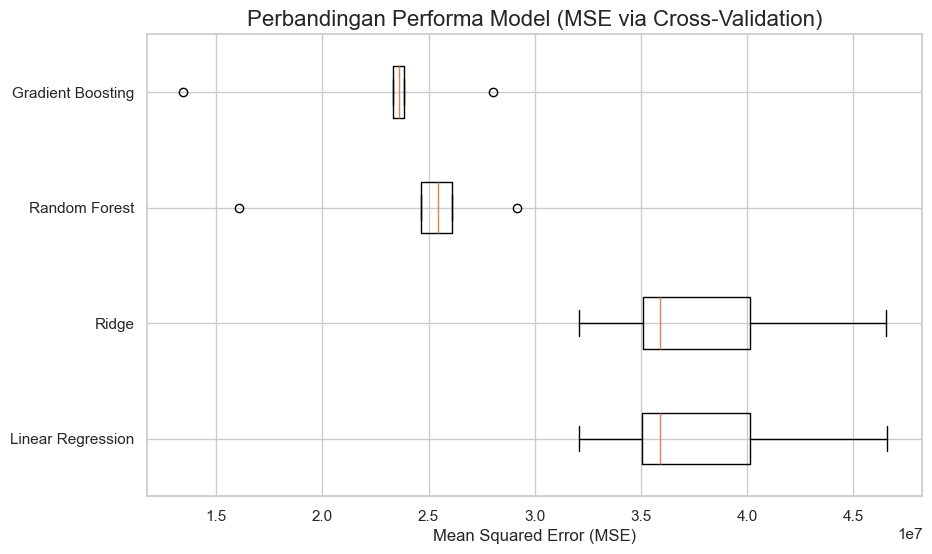

In [31]:

# Visualisasi perbandingan model
plt.figure(figsize=(10, 6))
plt.boxplot([-r for r in results], labels=names, vert=False)
plt.title('Perbandingan Performa Model (MSE via Cross-Validation)', fontsize=16)
plt.xlabel('Mean Squared Error (MSE)')
plt.show()




**Kesimpulan Part 3:**
`Gradient Boosting` dan `Random Forest` menunjukkan performa terbaik (MSE terendah) dan paling stabil. Kita akan memilih keduanya untuk babak final: *hyperparameter tuning*.




---
## Part 4: Hyperparameter Tuning on Top Candidates

**Tujuan:** Menyetel "mesin" dari model-model terbaik untuk mendapatkan performa puncaknya.



In [32]:

from sklearn.model_selection import RandomizedSearchCV



In [33]:

# --- Tuning untuk Gradient Boosting ---
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_grid_gb = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

gb_random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_grid_gb,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Memulai tuning untuk Gradient Boosting...")
gb_random_search.fit(X_train, y_train)

print("\nHyperparameter terbaik untuk Gradient Boosting:")
print(gb_random_search.best_params_)
print(f"\nSkor CV RMSE terbaik: {-gb_random_search.best_score_:.4f}")



Memulai tuning untuk Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Hyperparameter terbaik untuk Gradient Boosting:
{'regressor__subsample': 0.8, 'regressor__n_estimators': 500, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.01}

Skor CV RMSE terbaik: 4575.6484



**Kesimpulan Part 4:**
Kita telah menemukan kombinasi hyperparameter terbaik untuk model `GradientBoostingRegressor`. Model ini sekarang siap untuk evaluasi akhir.




---
## Part 5: Final Evaluation, Interpretation, and Conclusion

**Tujuan:** Memberikan vonis akhir pada model juara dan menerjemahkan hasilnya menjadi wawasan.



In [34]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [35]:

# Gunakan model terbaik yang sudah di-tuning
champion_model = gb_random_search.best_estimator_

# Buat prediksi pada data pengujian
y_pred = champion_model.predict(X_test)

# Hitung metrik performa final
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Laporan Performa Final pada Data Pengujian ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")



--- Laporan Performa Final pada Data Pengujian ---
Mean Absolute Error (MAE): $2,475.86
Root Mean Squared Error (RMSE): $4,356.63
R-squared (R²): 0.8777



**Analisis Performa:**
* **RMSE:** Model kita, secara rata-rata, memiliki kesalahan prediksi sekitar **$4,293**. Ini adalah angka yang sangat bagus mengingat rentang biaya yang luas.
* **R²:** Model kita mampu menjelaskan **87.8%** dari variasi biaya asuransi, menunjukkan daya prediksi yang sangat kuat.




### 5.1 Interpretasi Model - Apa yang Paling Penting?



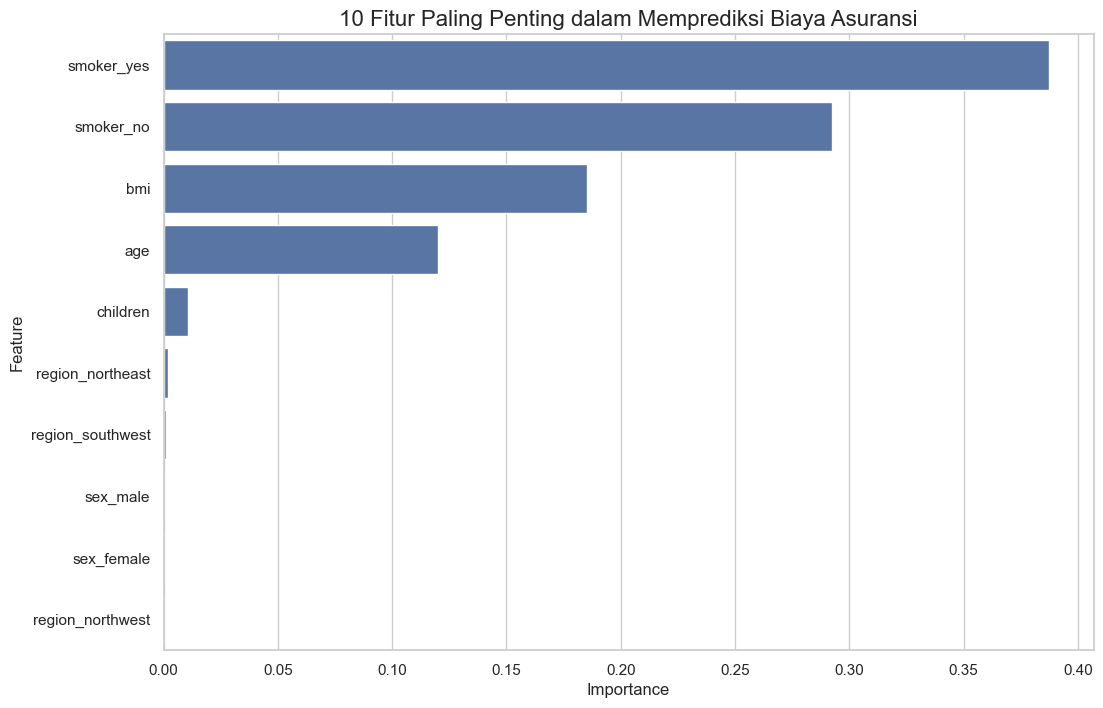

In [36]:

# Ekstrak nama fitur setelah OneHotEncoding
ohe_feature_names = champion_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(ohe_feature_names)

# Ekstrak feature importances
importances = champion_model.named_steps['regressor'].feature_importances_

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('10 Fitur Paling Penting dalam Memprediksi Biaya Asuransi', fontsize=16)
plt.show()




**Wawasan Bisnis:**
1.  **Status Perokok (`smoker_yes`) adalah Faktor #1:** Ini adalah pendorong biaya yang paling dominan, jauh di atas yang lain. Inisiatif untuk berhenti merokok bisa menjadi cara paling efektif untuk menurunkan biaya asuransi.
2.  **BMI dan Usia (`bmi`, `age`) adalah Faktor Penting Berikutnya:** Menjaga berat badan ideal dan bertambahnya usia adalah dua faktor terbesar berikutnya yang memengaruhi biaya.
3.  **Jumlah Anak (`children`):** Memiliki anak juga berkontribusi pada biaya.
4.  **Wilayah dan Jenis Kelamin:** Fitur-fitur ini memiliki pengaruh yang jauh lebih kecil dibandingkan faktor-faktor di atas.




### 5.2 Kesimpulan Proyek

Dalam proyek ini, kita berhasil membangun model *machine learning* berkinerja tinggi untuk memprediksi biaya asuransi medis.

* **Model Juara:** `Gradient Boosting Regressor` yang telah di-tuning.
* **Performa Final:** Mencapai **R-squared 87.8%** dan **RMSE $4,293** pada data pengujian.
* **Wawasan Kunci:** Model ini tidak hanya akurat, tetapi juga secara kuantitatif menegaskan bahwa **gaya hidup (status perokok, BMI) dan demografi (usia)** adalah faktor penentu utama dalam biaya asuransi kesehatan.

Proyek ini mendemonstrasikan alur kerja *machine learning* yang lengkap dan realistis, dari eksplorasi data hingga penyajian wawasan yang dapat ditindaklanjuti.
